# A MACHINE LEARNING MODEL THAT DETECTS WHETHER THE TRANSACTION MADE BY CREDIT CARD IS NORMAL OR FRAUD

In [32]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# to ignore warnings

import warnings 
warnings.filterwarnings('ignore')

In [34]:
# laoding the dataset

df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,...,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62,0
1,0.0,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,...,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69,0
2,1.0,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,...,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66,0
3,1.0,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,...,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50,0
4,2.0,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,...,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.88112,10.07178,-9.83478,-2.06666,-5.36447,-2.60684,-4.91822,7.30533,1.91443,...,0.21345,0.11186,1.01448,-0.50935,1.43681,0.25003,0.94365,0.82373,0.77,0
284803,172787.0,-0.73279,-0.05508,2.03503,-0.73859,0.86823,1.05842,0.02433,0.29487,0.58480,...,0.21421,0.92438,0.01246,-1.01623,-0.60662,-0.39526,0.06847,-0.05353,24.79,0
284804,172788.0,1.91957,-0.30125,-3.24964,-0.55783,2.63052,3.03126,-0.29683,0.70842,0.43245,...,0.23205,0.57823,-0.03750,0.64013,0.26575,-0.08737,0.00445,-0.02656,67.88,0
284805,172788.0,-0.24044,0.53048,0.70251,0.68980,-0.37796,0.62371,-0.68618,0.67915,0.39209,...,0.26524,0.80005,-0.16330,0.12321,-0.56916,0.54667,0.10882,0.10453,10.00,0


## DATA ANALYSIS

In [35]:
# printing the first five rows of the data

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,...,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62,0
1,0.0,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,...,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69,0
2,1.0,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,...,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66,0
3,1.0,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,...,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50,0
4,2.0,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,...,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99,0


In [36]:
# to print the last 5 rows of the data

df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.88112,10.07178,-9.83478,-2.06666,-5.36447,-2.60684,-4.91822,7.30533,1.91443,...,0.21345,0.11186,1.01448,-0.50935,1.43681,0.25003,0.94365,0.82373,0.77,0
284803,172787.0,-0.73279,-0.05508,2.03503,-0.73859,0.86823,1.05842,0.02433,0.29487,0.58480,...,0.21421,0.92438,0.01246,-1.01623,-0.60662,-0.39526,0.06847,-0.05353,24.79,0
284804,172788.0,1.91957,-0.30125,-3.24964,-0.55783,2.63052,3.03126,-0.29683,0.70842,0.43245,...,0.23205,0.57823,-0.03750,0.64013,0.26575,-0.08737,0.00445,-0.02656,67.88,0
284805,172788.0,-0.24044,0.53048,0.70251,0.68980,-0.37796,0.62371,-0.68618,0.67915,0.39209,...,0.26524,0.80005,-0.16330,0.12321,-0.56916,0.54667,0.10882,0.10453,10.00,0
284806,172792.0,-0.53341,-0.18973,0.70334,-0.50627,-0.01255,-0.64962,1.57701,-0.41465,0.48618,...,0.26106,0.64308,0.37678,0.00880,-0.47365,-0.81827,-0.00242,0.01365,217.00,0


In [37]:
# to print specific no. of rows 

df.head(2) # it will print 2 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.2396,0.0987,0.36379,...,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62,0
1,0.0,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.0788,0.0851,-0.25543,...,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69,0


In [38]:
# to know the shape of the data, no. of rows and columns

df.shape

(284807, 31)

In [39]:
# to know the summary of the data (memory usage, no. of non-null data, index and columns, datatypes)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [40]:
# to know the statistics of the data

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,...,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,284807.00000,284807.00000
mean,94813.85958,1.16837e-15,3.41691e-16,-1.37954e-15,2.07410e-15,9.60407e-16,1.48731e-15,-5.55647e-16,1.21348e-16,-2.40633e-15,...,1.65407e-16,-3.56859e-16,2.57865e-16,4.47327e-15,5.34091e-16,1.68344e-15,-3.66009e-16,-1.22739e-16,88.34962,0.00173
std,47488.14595,1.95870e+00,1.65131e+00,1.51626e+00,1.41587e+00,1.38025e+00,1.33227e+00,1.23709e+00,1.19435e+00,1.09863e+00,...,7.34524e-01,7.25702e-01,6.24460e-01,6.05647e-01,5.21278e-01,4.82227e-01,4.03632e-01,3.30083e-01,250.12011,0.04153
min,0.00000,-5.64075e+01,-7.27157e+01,-4.83256e+01,-5.68317e+00,-1.13743e+02,-2.61605e+01,-4.35572e+01,-7.32167e+01,-1.34341e+01,...,-3.48304e+01,-1.09331e+01,-4.48077e+01,-2.83663e+00,-1.02954e+01,-2.60455e+00,-2.25657e+01,-1.54301e+01,0.00000,0.00000
25%,54201.50000,-9.20373e-01,-5.98550e-01,-8.90365e-01,-8.48640e-01,-6.91597e-01,-7.68296e-01,-5.54076e-01,-2.08630e-01,-6.43098e-01,...,-2.28395e-01,-5.42350e-01,-1.61846e-01,-3.54586e-01,-3.17145e-01,-3.26984e-01,-7.08395e-02,-5.29598e-02,5.60000,0.00000
50%,84692.00000,1.81088e-02,6.54856e-02,1.79846e-01,-1.98465e-02,-5.43358e-02,-2.74187e-01,4.01031e-02,2.23580e-02,-5.14287e-02,...,-2.94502e-02,6.78194e-03,-1.11929e-02,4.09761e-02,1.65935e-02,-5.21391e-02,1.34215e-03,1.12438e-02,22.00000,0.00000
75%,139320.50000,1.31564e+00,8.03724e-01,1.02720e+00,7.43341e-01,6.11926e-01,3.98565e-01,5.70436e-01,3.27346e-01,5.97139e-01,...,1.86377e-01,5.28554e-01,1.47642e-01,4.39527e-01,3.50716e-01,2.40952e-01,9.10451e-02,7.82800e-02,77.16500,0.00000
max,172792.00000,2.45493e+00,2.20577e+01,9.38256e+00,1.68753e+01,3.48017e+01,7.33016e+01,1.20589e+02,2.00072e+01,1.55950e+01,...,2.72028e+01,1.05031e+01,2.25284e+01,4.58455e+00,7.51959e+00,3.51735e+00,3.16122e+01,3.38478e+01,25691.16000,1.00000


In [41]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,...,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,284807.00000,284807.00000
mean,94813.85958,1.16837e-15,3.41691e-16,-1.37954e-15,2.07410e-15,9.60407e-16,1.48731e-15,-5.55647e-16,1.21348e-16,-2.40633e-15,...,1.65407e-16,-3.56859e-16,2.57865e-16,4.47327e-15,5.34091e-16,1.68344e-15,-3.66009e-16,-1.22739e-16,88.34962,0.00173
std,47488.14595,1.95870e+00,1.65131e+00,1.51626e+00,1.41587e+00,1.38025e+00,1.33227e+00,1.23709e+00,1.19435e+00,1.09863e+00,...,7.34524e-01,7.25702e-01,6.24460e-01,6.05647e-01,5.21278e-01,4.82227e-01,4.03632e-01,3.30083e-01,250.12011,0.04153
min,0.00000,-5.64075e+01,-7.27157e+01,-4.83256e+01,-5.68317e+00,-1.13743e+02,-2.61605e+01,-4.35572e+01,-7.32167e+01,-1.34341e+01,...,-3.48304e+01,-1.09331e+01,-4.48077e+01,-2.83663e+00,-1.02954e+01,-2.60455e+00,-2.25657e+01,-1.54301e+01,0.00000,0.00000
25%,54201.50000,-9.20373e-01,-5.98550e-01,-8.90365e-01,-8.48640e-01,-6.91597e-01,-7.68296e-01,-5.54076e-01,-2.08630e-01,-6.43098e-01,...,-2.28395e-01,-5.42350e-01,-1.61846e-01,-3.54586e-01,-3.17145e-01,-3.26984e-01,-7.08395e-02,-5.29598e-02,5.60000,0.00000
50%,84692.00000,1.81088e-02,6.54856e-02,1.79846e-01,-1.98465e-02,-5.43358e-02,-2.74187e-01,4.01031e-02,2.23580e-02,-5.14287e-02,...,-2.94502e-02,6.78194e-03,-1.11929e-02,4.09761e-02,1.65935e-02,-5.21391e-02,1.34215e-03,1.12438e-02,22.00000,0.00000
75%,139320.50000,1.31564e+00,8.03724e-01,1.02720e+00,7.43341e-01,6.11926e-01,3.98565e-01,5.70436e-01,3.27346e-01,5.97139e-01,...,1.86377e-01,5.28554e-01,1.47642e-01,4.39527e-01,3.50716e-01,2.40952e-01,9.10451e-02,7.82800e-02,77.16500,0.00000
max,172792.00000,2.45493e+00,2.20577e+01,9.38256e+00,1.68753e+01,3.48017e+01,7.33016e+01,1.20589e+02,2.00072e+01,1.55950e+01,...,2.72028e+01,1.05031e+01,2.25284e+01,4.58455e+00,7.51959e+00,3.51735e+00,3.16122e+01,3.38478e+01,25691.16000,1.00000


In [42]:
pd.set_option('display.precision', 5)   # "precision=5" means that 5 values after the decimal will be displayed
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,...,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,284807.00000,284807.00000
mean,94813.85958,1.16837e-15,3.41691e-16,-1.37954e-15,2.07410e-15,9.60407e-16,1.48731e-15,-5.55647e-16,1.21348e-16,-2.40633e-15,...,1.65407e-16,-3.56859e-16,2.57865e-16,4.47327e-15,5.34091e-16,1.68344e-15,-3.66009e-16,-1.22739e-16,88.34962,0.00173
std,47488.14595,1.95870e+00,1.65131e+00,1.51626e+00,1.41587e+00,1.38025e+00,1.33227e+00,1.23709e+00,1.19435e+00,1.09863e+00,...,7.34524e-01,7.25702e-01,6.24460e-01,6.05647e-01,5.21278e-01,4.82227e-01,4.03632e-01,3.30083e-01,250.12011,0.04153
min,0.00000,-5.64075e+01,-7.27157e+01,-4.83256e+01,-5.68317e+00,-1.13743e+02,-2.61605e+01,-4.35572e+01,-7.32167e+01,-1.34341e+01,...,-3.48304e+01,-1.09331e+01,-4.48077e+01,-2.83663e+00,-1.02954e+01,-2.60455e+00,-2.25657e+01,-1.54301e+01,0.00000,0.00000
25%,54201.50000,-9.20373e-01,-5.98550e-01,-8.90365e-01,-8.48640e-01,-6.91597e-01,-7.68296e-01,-5.54076e-01,-2.08630e-01,-6.43098e-01,...,-2.28395e-01,-5.42350e-01,-1.61846e-01,-3.54586e-01,-3.17145e-01,-3.26984e-01,-7.08395e-02,-5.29598e-02,5.60000,0.00000
50%,84692.00000,1.81088e-02,6.54856e-02,1.79846e-01,-1.98465e-02,-5.43358e-02,-2.74187e-01,4.01031e-02,2.23580e-02,-5.14287e-02,...,-2.94502e-02,6.78194e-03,-1.11929e-02,4.09761e-02,1.65935e-02,-5.21391e-02,1.34215e-03,1.12438e-02,22.00000,0.00000
75%,139320.50000,1.31564e+00,8.03724e-01,1.02720e+00,7.43341e-01,6.11926e-01,3.98565e-01,5.70436e-01,3.27346e-01,5.97139e-01,...,1.86377e-01,5.28554e-01,1.47642e-01,4.39527e-01,3.50716e-01,2.40952e-01,9.10451e-02,7.82800e-02,77.16500,0.00000
max,172792.00000,2.45493e+00,2.20577e+01,9.38256e+00,1.68753e+01,3.48017e+01,7.33016e+01,1.20589e+02,2.00072e+01,1.55950e+01,...,2.72028e+01,1.05031e+01,2.25284e+01,4.58455e+00,7.51959e+00,3.51735e+00,3.16122e+01,3.38478e+01,25691.16000,1.00000


In [43]:
# to print the summary statistics for the first 7 columns of a DataFrame of the transposed dataframe

df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.48139e+04,47488.14595,0.00000,54201.50000,84692.00000,139320.50000,172792.00000
V1,284807.0,1.16837e-15,1.95870,-56.40751,-0.92037,0.01811,1.31564,2.45493
V2,284807.0,3.41691e-16,1.65131,-72.71573,-0.59855,0.06549,0.80372,22.05773
V3,284807.0,-1.37954e-15,1.51626,-48.32559,-0.89036,0.17985,1.02720,9.38256
V4,284807.0,2.07410e-15,1.41587,-5.68317,-0.84864,-0.01985,0.74334,16.87534


In [44]:
# to identify the most common values in a specific column

df.V1.value_counts().head()

V1
2.05580    77
1.24567    77
2.05331    62
1.30238    60
2.04021    53
Name: count, dtype: int64

In [45]:
# to know the unique values in 'class' column

df.Class.unique()

array([0, 1], dtype=int64)

In [46]:
# to know datatype of column 'class'

df['Class'].dtype

dtype('int64')

## NULL VALUE ANALYSIS

In [47]:
# to know which columns have how much null values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
# to know the no. of not-null values in the columns

df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

## RESPONSE VALUE ANALYSIS

In [49]:
# response variable, count no. of normal and fraud transactions

class_names = {0:'Not Fraud', 1:'Fraud'} # to tell as boolean value
print(df.Class.value_counts().rename(index=class_names))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


## TRAIN TEST SPLIT

In [50]:
# importing the train_test_split function from sklearn.model_selection module

from sklearn.model_selection import train_test_split

In [51]:
# to removing or dropping the data we do not want
# method 1

Y=df["Class"]
X=df.loc[:,df.columns !='Class']

In [52]:
# method 2

Y=df.Class
X=df.drop(['Class'],axis=1)

In [53]:
# splitting the data into testing and training data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=1, stratify = Y)

In [54]:
# printing the input data that is used as training data

X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9341,13558.0,1.14861,-0.00415,-0.23111,1.12426,0.69608,1.17752,-0.16014,0.20148,1.56827,...,-0.12282,-0.29433,-0.55062,-0.30969,-1.77349,0.79101,-0.26395,-0.00849,-0.01128,58.80
210529,138022.0,-0.91054,-0.97125,1.03383,-1.51411,-1.06854,0.14863,-0.66071,0.69458,-0.56315,...,0.36253,0.18342,0.08203,0.24517,-0.34790,-0.04663,-0.36693,-0.13032,-0.16184,142.30
51525,44997.0,1.22250,0.49190,-0.08252,0.98791,0.16468,-0.84545,0.51511,-0.25826,-0.66744,...,-0.07670,0.06812,0.24472,-0.17380,0.37388,0.84920,-0.31727,-0.00742,0.00369,7.99
128333,78673.0,1.18430,-0.06629,0.40033,-0.04828,-0.44746,-0.52126,-0.10320,-0.04464,-0.03267,...,0.04119,-0.26842,-0.90014,0.11250,0.03248,0.04680,0.47213,-0.06801,0.00834,40.00
252025,155618.0,-0.48406,0.43938,-2.03310,-3.39876,2.20926,3.17579,-0.56631,0.42399,-1.28170,...,-0.17199,1.34478,1.27185,0.05581,0.73528,-0.62951,-0.17830,0.39432,0.24015,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249626,154502.0,-0.31281,1.57152,0.62507,2.85160,1.44090,0.37027,1.55942,-0.12263,-2.12706,...,-0.01367,-0.07284,-0.27630,-0.14414,-0.81340,-0.09457,-0.08697,0.10127,0.15489,49.66
188363,127940.0,2.31349,-1.06666,-2.69880,-1.81069,0.18193,-0.82516,0.01405,-0.49744,-2.46654,...,-0.30371,0.17550,0.94373,-0.20999,0.37170,0.68814,0.27035,-0.07880,-0.08702,54.00
224660,143903.0,1.98033,0.10443,-0.92328,1.35365,0.04792,-0.22306,-0.38254,0.03446,0.96514,...,-0.21761,-0.28340,-0.67784,0.26357,-0.96197,-0.29811,-0.88823,0.07312,-0.00563,7.90
206178,136098.0,1.88899,-0.19960,-0.40177,1.36691,-0.10534,0.44104,-0.40139,0.22703,0.89431,...,-0.25458,-0.46972,-1.12024,0.47017,0.62009,-0.34725,-1.15570,0.04938,-0.03330,8.65


In [55]:
# printing the input data that is used as testing data

X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
32255,36710.0,1.14368,-0.17198,1.23736,0.87306,-1.04743,-0.27932,-0.55068,0.02803,0.82151,...,-0.01488,-0.07164,-0.02285,0.00573,0.45444,0.27105,0.31190,0.01775,0.03231,28.75
171386,120618.0,1.90773,-0.03694,-1.95663,0.39733,0.36672,-0.96715,0.26878,-0.24965,0.32786,...,-0.03147,0.25919,0.74010,-0.14503,-0.47233,0.25397,-0.10445,-0.01771,-0.03069,72.51
198944,132724.0,-0.79045,0.28324,1.02773,-0.40738,1.45568,5.59616,-2.18789,-0.90853,1.15696,...,-0.57166,2.35171,-0.46272,-0.64177,0.70812,1.61484,-0.24210,0.31232,0.16532,51.70
203157,134681.0,2.07368,0.08941,-1.70924,0.43434,0.31071,-0.92409,0.11700,-0.18140,0.64390,...,-0.22312,-0.37455,-1.02043,0.35665,0.54055,-0.29611,0.17309,-0.06905,-0.03243,0.89
49766,44200.0,-3.02272,2.55456,-1.63856,-2.87088,1.32220,2.94814,-0.61656,1.68375,1.62132,...,1.18269,-0.45221,-0.71541,0.10104,0.99096,0.36146,0.70149,0.25605,-0.25248,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199742,133112.0,1.57065,-1.58375,-1.12045,-0.38829,-1.15011,-1.03841,-0.04412,-0.32119,-0.24453,...,-0.05034,-0.61555,-1.98066,0.34929,-0.12574,-0.83688,-0.56266,-0.05416,0.01415,303.43
22681,32379.0,-0.75956,0.03425,2.28673,-0.49993,-0.09981,1.51365,-0.21417,0.59366,1.23831,...,-0.09991,-0.05362,0.11663,-0.31553,-1.27670,0.17787,0.52580,0.08748,0.08424,43.50
138758,82830.0,-3.49401,3.10498,-0.71275,-0.18433,-1.29297,-0.86508,-0.90537,1.70470,-0.96368,...,-0.83120,0.60553,0.40675,0.04102,0.31034,0.12988,-0.68269,-2.05419,-0.20682,1.93
212696,138961.0,-0.79978,0.77571,1.82363,-0.60902,0.00777,0.09200,0.54655,0.24275,-0.04546,...,0.18474,-0.22806,-0.61315,-0.20812,-0.39612,0.36689,-0.43890,0.29709,0.12327,36.44


In [56]:
# the output labels to the response of input training data

Y_train

9341      0
210529    0
51525     0
128333    0
252025    0
         ..
249626    0
188363    0
224660    0
206178    0
99525     0
Name: Class, Length: 227845, dtype: int64

In [57]:
# the ouput labels to the response of testing input data

Y_test

32255     0
171386    0
198944    0
203157    0
49766     0
         ..
199742    0
22681     0
138758    0
212696    0
203581    0
Name: Class, Length: 56962, dtype: int64

## TRAINING THE MODEL WITH LOGISTIC REGRESSION

In [58]:
# importing logistic regression class from sklearn.linear_model module

from sklearn.linear_model import LogisticRegression

In [59]:
# training and fitting the model

lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [60]:
# using the trained model to make predictions on testing data

Y_lr = lr.predict(X_test)
Y_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
# importing confusion matrix and accuracy score fucntion to find the accuracy of the model and to know the performance of the model

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [63]:
# finding the accuracy 

accuracy_score(Y_test,Y_lr)

0.9992451107756047

In [65]:
accuracy_score(Y_test,Y_lr)*100

99.92451107756047

In [66]:
# creating the confusion matrix

confusion_matrix(Y_test,Y_lr)

array([[56839,    25],
       [   18,    80]], dtype=int64)

<Axes: >

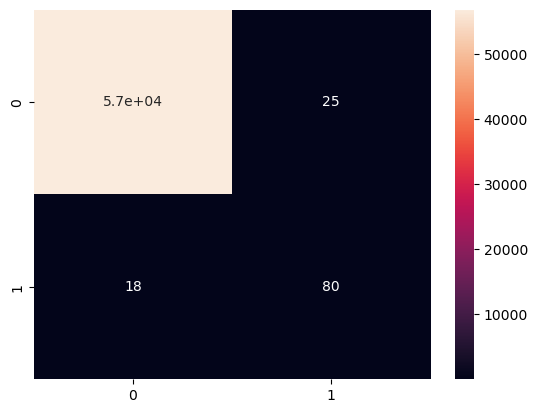

In [67]:
# creating heat map

sns.heatmap(confusion_matrix(Y_test,Y_lr),annot=True) 

## TRAINING THE MODEL WITH LINEAR DISCRIMINANT ANALYSIS


In [68]:
# importing linear discriminant class from sklearn.discriminant_analysis module

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [69]:
# training and fitting the model

LDA=LinearDiscriminantAnalysis()
LDA.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [70]:
# using the trained model to make predictions on testing data

Y_lda = LDA.predict(X_test)
Y_lda

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
# importing confusion matrix and accuracy score fucntion to find the accuracy of the model and to know the performance of the model

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [72]:
# finding the accuracy 

accuracy_score(Y_test,Y_lda)

0.9995435553526912

In [73]:
# creating the confusion matrix

confusion_matrix(Y_test,Y_lda)

array([[56854,    10],
       [   16,    82]], dtype=int64)

<Axes: >

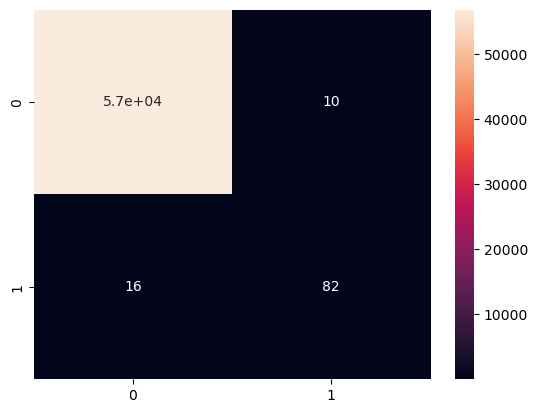

In [74]:
# creating heat map

sns.heatmap(confusion_matrix(Y_test,Y_lda),annot=True) 

## TRAINING THE MODEL WITH GAUSSIAN NAIVE BAYES

In [75]:
# importing gaussian nb class from sklearn.naive_bayes module

from sklearn.naive_bayes import GaussianNB

In [76]:
# training and fitting the model

GNB=GaussianNB()
GNB.fit(X_train,Y_train)

GaussianNB()

In [77]:
# using the trained model to make predictions on testing data

Y_gnb = GNB.predict(X_test)
Y_gnb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
# finding the accuracy 

accuracy_score(Y_test,Y_gnb)

0.9926266633896281

In [79]:
# creating the confusion matrix

confusion_matrix(Y_test,Y_gnb)

array([[56470,   394],
       [   26,    72]], dtype=int64)

<Axes: >

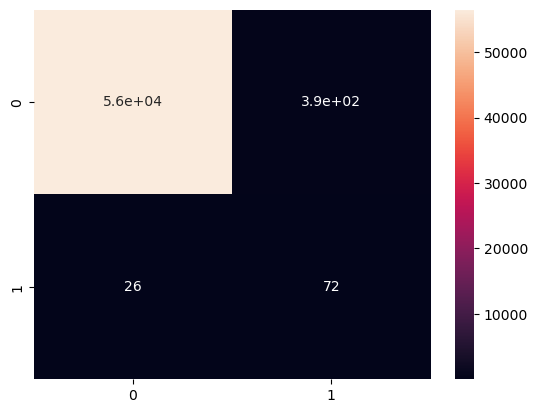

In [80]:
# creating heat map

sns.heatmap(confusion_matrix(Y_test,Y_gnb),annot=True) 

## TRAINING THE MODEL WITH KNN CLASSIFIER

In [81]:
# importing knn classifier class from sklearn.neighbors module

from sklearn.neighbors import KNeighborsClassifier

In [82]:
# training and fitting the model

k=3
knn=KNeighborsClassifier(n_neighbors=k) 
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
# using the trained model to make predictions on testing data

Y_knn = knn.predict(X_test) 
Y_knn 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
# finding the accuracy 

accuracy_score(Y_test,Y_knn)

0.9984199992977775

In [87]:
# creating the confusion matrix

confusion_matrix(Y_test,Y_knn)

array([[56862,     2],
       [   88,    10]], dtype=int64)

<Axes: >

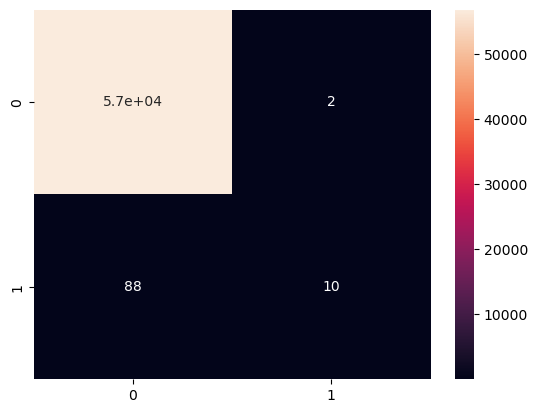

In [88]:
# creating heat map

sns.heatmap(confusion_matrix(Y_test,Y_knn),annot=True) 

## TRAINING THE MODEL WITH RANDOM FOREST CLASSIFIER

In [90]:
# importing random forest classifier class from sklearn.ensemble module

from sklearn.ensemble import RandomForestClassifier

In [92]:
# training and fitting the model

n_estimators = 100  
rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)  
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [93]:
# using the trained model to make predictions on testing data

Y_rfc = knn.predict(X_test) 
Y_rfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
# finding the accuracy 

accuracy_score(Y_test,Y_rfc)

0.9984199992977775

In [95]:
# creating the confusion matrix

confusion_matrix(Y_test,Y_rfc)

array([[56862,     2],
       [   88,    10]], dtype=int64)

<Axes: >

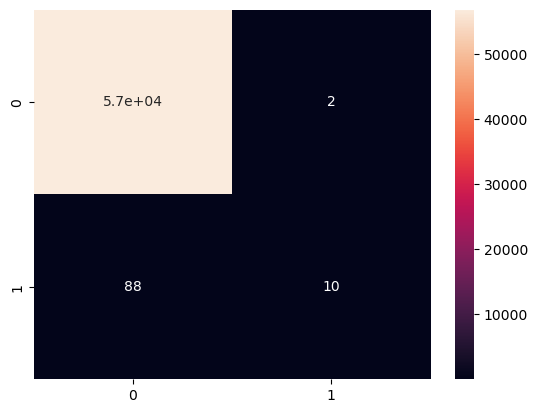

In [96]:
# creating heat map

sns.heatmap(confusion_matrix(Y_test,Y_rfc),annot=True) 